In [90]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
#https://www.kaggle.com/datasets/yasserh/customer-segmentation-dataset/code?datasetId=1835880&sortBy=voteCount

In [91]:
df=pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [93]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [94]:
df.shape #There are values which are less than 0. They might be refund items

(541909, 8)

In [95]:
data=df.copy()

In [96]:
# we can analyze the top 10 most frequently returned products
refunded_items=data[data['Quantity']<0]
refunded_items['Description'].value_counts().head(10)

Manual                               244
REGENCY CAKESTAND 3 TIER             181
POSTAGE                              126
check                                120
JAM MAKING SET WITH JARS              87
Discount                              77
SET OF 3 CAKE TINS PANTRY DESIGN      74
SAMPLES                               61
STRAWBERRY CERAMIC TRINKET BOX        55
ROSES REGENCY TEACUP AND SAUCER       54
Name: Description, dtype: int64

In [98]:
data = data[data['Quantity'] >= 0]
data = data[data['UnitPrice'] >= 0]
#taking values for quantity and unitprice over 0 .we don't need them.

data['Description'].value_counts().head(10).head(10) #Best 10 selling product


WHITE HANGING HEART T-LIGHT HOLDER    2327
JUMBO BAG RED RETROSPOT               2115
REGENCY CAKESTAND 3 TIER              2019
PARTY BUNTING                         1707
LUNCH BAG RED RETROSPOT               1594
ASSORTED COLOUR BIRD ORNAMENT         1489
SET OF 3 CAKE TINS PANTRY DESIGN      1399
PACK OF 72 RETROSPOT CAKE CASES       1370
LUNCH BAG  BLACK SKULL.               1328
NATURAL SLATE HEART CHALKBOARD        1263
Name: Description, dtype: int64

In [99]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,531283.000000,531283.000000,397924.000000
mean,10.655299,3.898954,15294.315171
std,156.830617,35.876279,1713.169877
min,1.000000,0.000000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [100]:
data['Amount']=data['Quantity'] * data['UnitPrice'] #Total shopping earnings

In [101]:
data.drop(columns=['Quantity', 'UnitPrice','Description'], inplace=True) # dropping unneccessary columns


In [102]:
data.nunique()


InvoiceNo      20726
StockCode       3941
InvoiceDate    19050
CustomerID      4339
Country           38
Amount          4907
dtype: int64

In [103]:
data.groupby('CustomerID')['InvoiceNo'].value_counts()

CustomerID  InvoiceNo
12346.0     541431        1
12347.0     573511       47
            537626       31
            542237       29
            549222       24
                         ..
18283.0     560032        1
            575675        1
18287.0     570715       38
            554065       29
            573167        3
Name: InvoiceNo, Length: 18536, dtype: int64

In [104]:
shopping_time=data.groupby('CustomerID')['InvoiceNo'].count()  #How many times  did the customer  shop ?
shopping_time=pd.DataFrame(shopping_time)
shopping_time.rename(columns={'InvoiceNo':'number of shopping'},inplace=True)
shopping_time=shopping_time.sort_values(by='number of shopping',ascending=False) #sorting
shopping_time


,number of shopping
CustomerID,
17841.0,7847
14911.0,5677
14096.0,5111
12748.0,4596
14606.0,2700
...,...
15940.0,1
15823.0,1
15802.0,1


In [105]:
sum_of_shopping = data.groupby('CustomerID')['Amount'].sum()  #How much did the customer spend money ?
sum_of_shopping.name='Amount'
sum_of_shopping=pd.DataFrame(sum_of_shopping)
sum_of_shopping=sum_of_shopping.sort_values(by='Amount',ascending=False) #Sorting
sum_of_shopping

,Amount
CustomerID,
14646.0,280206.02
18102.0,259657.30
17450.0,194550.79
16446.0,168472.50
14911.0,143825.06
...,...
17956.0,12.75
16454.0,6.90
14792.0,6.20


In [106]:
dataframe = pd.merge(left=shopping_time, right=sum_of_shopping, left_index=True, right_index=True)


dataframe=pd.DataFrame(dataframe) #Joining columns for using in our models later.
dataframe

,number of shopping,Amount
CustomerID,,
17841.0,7847,40991.57
14911.0,5677,143825.06
14096.0,5111,65164.79
12748.0,4596,33719.73
14606.0,2700,12156.65
...,...,...
15940.0,1,35.80
15823.0,1,15.00
15802.0,1,451.42


In [107]:
data['Country']=data['Country'].astype(str) #Changing data type for visualization


In [108]:
country_graph=data['Country'].value_counts()
country_graph

United Kingdom          486284
Germany                   9042
France                    8408
EIRE                      7894
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1967
Portugal                  1501
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Unspecified                446
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon 

In [109]:
country_graph.index

Index(['United Kingdom', 'Germany', 'France', 'EIRE', 'Spain', 'Netherlands',
       'Belgium', 'Switzerland', 'Portugal', 'Australia', 'Norway', 'Italy',
       'Channel Islands', 'Finland', 'Cyprus', 'Sweden', 'Unspecified',
       'Austria', 'Denmark', 'Poland', 'Japan', 'Israel', 'Hong Kong',
       'Singapore', 'Iceland', 'USA', 'Canada', 'Greece', 'Malta',
       'United Arab Emirates', 'European Community', 'RSA', 'Lebanon',
       'Lithuania', 'Brazil', 'Czech Republic', 'Bahrain', 'Saudi Arabia'],
      dtype='object')

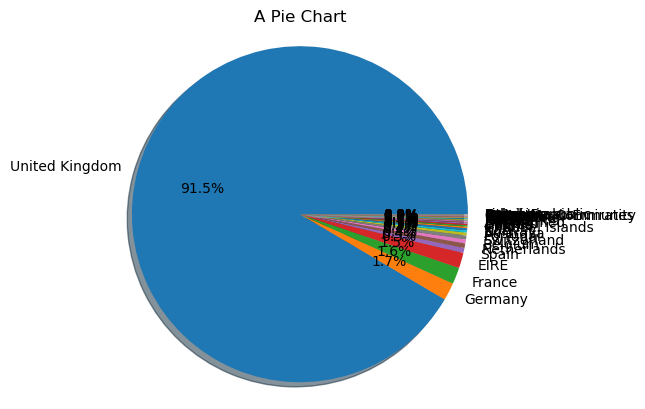

In [110]:

plt.pie(country_graph,labels=country_graph.index, autopct='%1.1f%%', shadow=True)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('A Pie Chart')
plt.show()

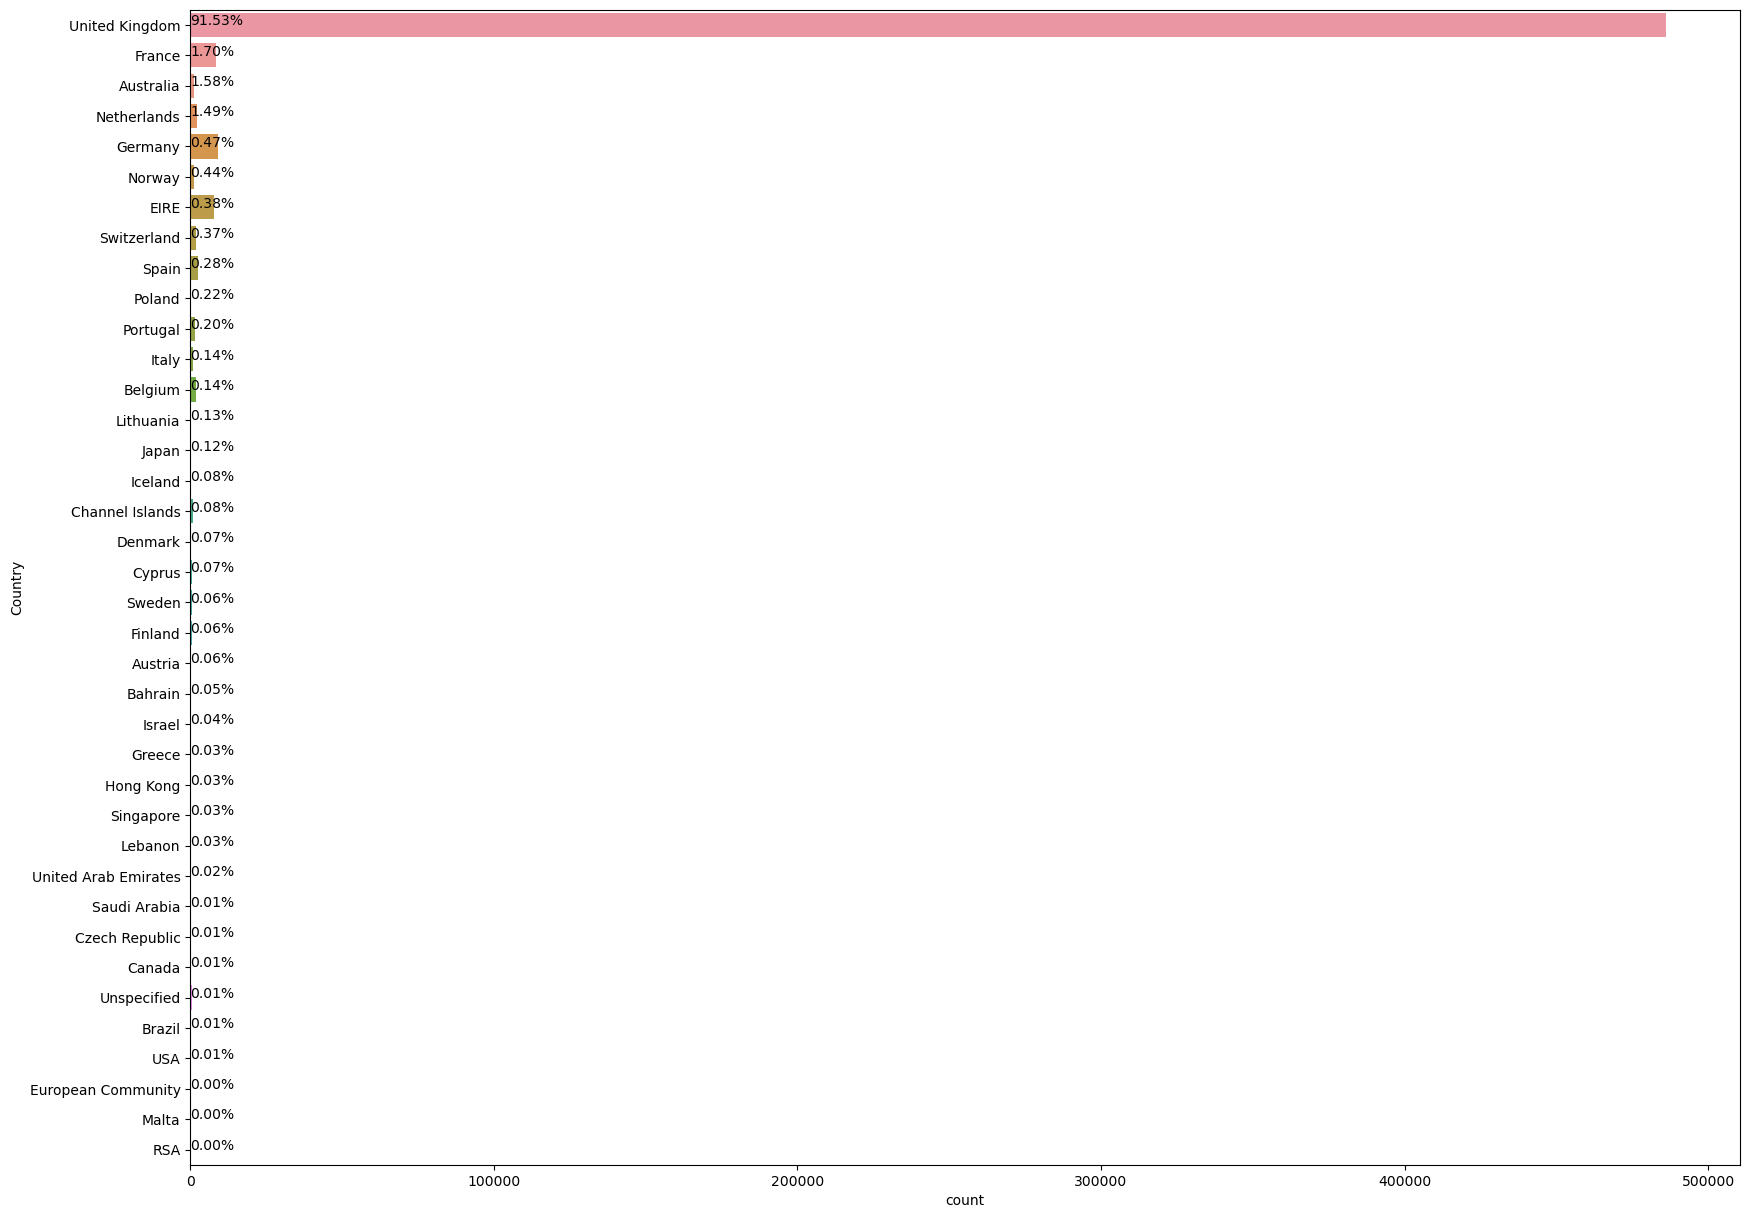

In [111]:
country_percentage = data['Country'].value_counts(normalize=True) * 100

plt.figure(figsize=(20,15))
ax=sns.countplot(data=data,y=data['Country'])
for i, v in enumerate(country_percentage):
    ax.text(v, i, f'{v:.2f}%')
    
plt.show()

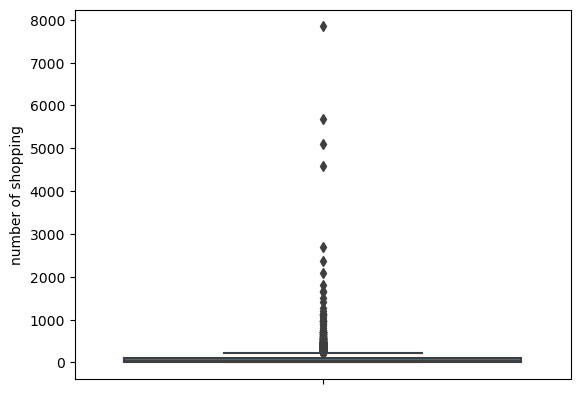

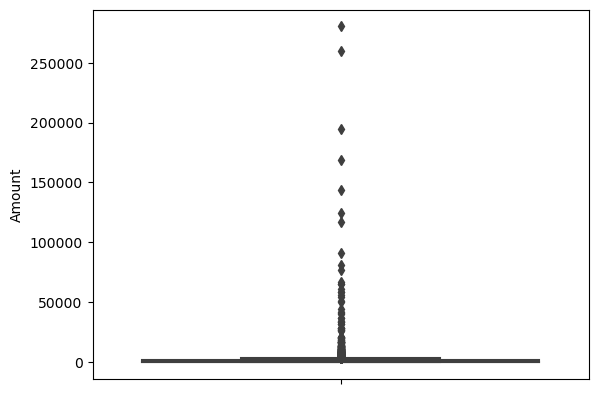

In [112]:
for i in dataframe.columns: #box plot for outliers
    sns.boxplot(data=dataframe,y=i)
    plt.show()

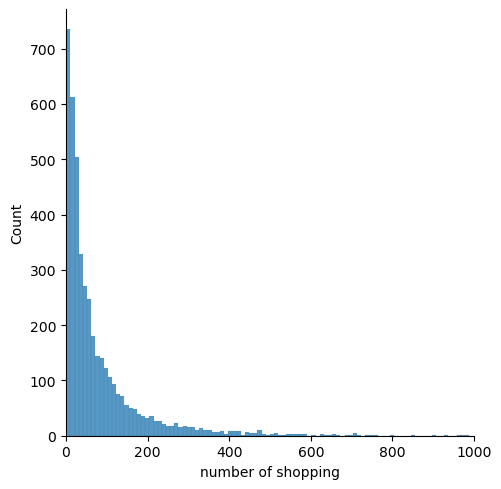

In [121]:

sns.displot(data=dataframe, x='number of shopping')
plt.xlim(0,1000)
plt.show()



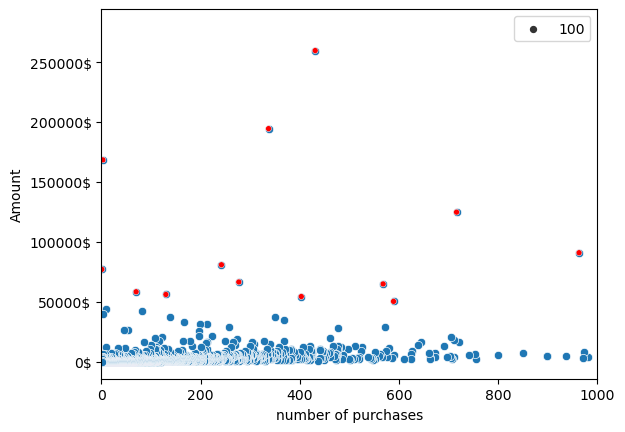

In [ ]:

sns.scatterplot(data=dataframe, x='number of shopping',y='Amount')    #Scatter plot for Purchases over 50k$

plt.xlim(0, 1000)

threshold=50000
outliers=dataframe[dataframe['Amount']>threshold]
sns.scatterplot(data=outliers,x='number of shopping',y='Amount',color='red',markers='x',size=100)
plt.yticks(range(0,260000,50000),[str(x) + '$' for x  in range(0,260000,50000)])

plt.show()




In [ ]:
from sklearn.preprocessing import StandardScaler  #standardization
scaler=StandardScaler()
scaled=scaler.fit_transform(dataframe) 


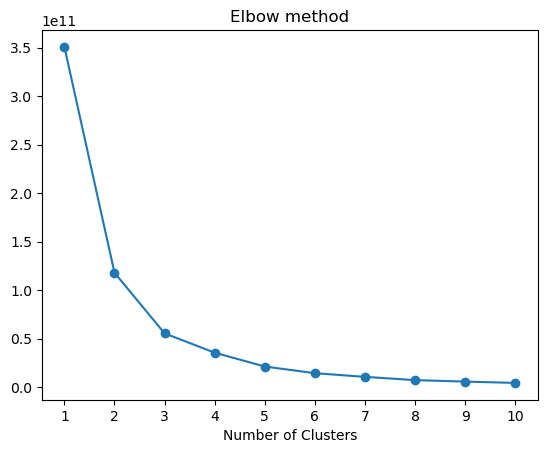

In [114]:
from sklearn.cluster import KMeans  
# elbow method
wcss=[]
for k in range(1,11):
    km=KMeans(n_clusters=k,n_init=10,random_state=58)
    km.fit(dataframe)
    wcss.append(km.inertia_)

plt.plot(range(1,11),wcss,marker='o')
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.title('Elbow method')
plt.show()
           

In [115]:
model = KMeans(n_clusters=3,n_init=10,random_state=58)  
model.fit(dataframe)
dataframe

,number of shopping,Amount
CustomerID,,
17841.0,7847,40991.57
14911.0,5677,143825.06
14096.0,5111,65164.79
12748.0,4596,33719.73
14606.0,2700,12156.65
...,...,...
15940.0,1,35.80
15823.0,1,15.00
15802.0,1,451.42


In [116]:
clustered_df=pd.DataFrame(scaled,columns=dataframe.columns,index=dataframe.index) #scaled data,column,index
clustered_df['Cluster']=model.labels_
clustered_df

,number of shopping,Amount,Cluster
CustomerID,,,
17841.0,33.900470,4.332575,2
14911.0,24.414814,15.774776,1
14096.0,21.940676,7.022310,2
12748.0,19.689472,3.523444,2
14606.0,11.401545,1.124137,0
...,...,...,...
15940.0,-0.396512,-0.224540,0
15823.0,-0.396512,-0.226855,0
15802.0,-0.396512,-0.178295,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


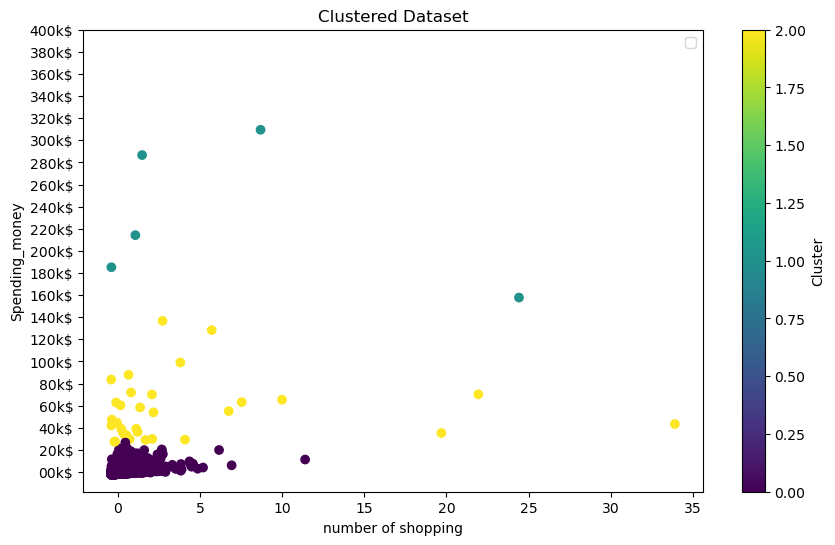

In [128]:
total_number_of_purchases= clustered_df['number of shopping']#visualization Customer type depends on How much money they spend and how many times they shop from that company.
Spending_money = clustered_df['Amount']
Cluster = clustered_df['Cluster']

plt.figure(figsize=(10, 6))
plt.scatter(total_number_of_purchases, Spending_money, c=Cluster, cmap='viridis')


plt.xlabel('number of shopping')
plt.ylabel('Spending_money')
plt.title('Clustered Dataset')
plt.yticks(range(0, 41, 2), [str(i) + '0k$' for i in range(0, 41, 2)]) 
plt.colorbar(label='Cluster')
plt.show()


In [118]:
#testing data for Purple cluster
test_data=pd.DataFrame({'CustomerID':[11111],'number of shopping':[15],'Amount':[15000]})
predicted_cluster = model.predict(test_data[['number of shopping', 'Amount']])


print("Predicted Cluster:", predicted_cluster)

Predicted Cluster: [0]


In [119]:
#Testing  for  green cluster
test_data=pd.DataFrame({'CustomerID':[11111],'number of shopping':[50],'Amount':[145000]})
predicted_cluster = model.predict(test_data[['number of shopping', 'Amount']])


print("Predicted Cluster:", predicted_cluster)

Predicted Cluster: [1]


In [120]:
#Testing  for Yellow Cluster
test_data=pd.DataFrame({'CustomerID':[11111],'number of shopping':[10],'Amount':[45000]})
predicted_cluster = model.predict(test_data[['number of shopping', 'Amount']])


print("Predicted Cluster:", predicted_cluster)

Predicted Cluster: [2]


0=Purple Cluster  
  
1=Green Cluster
        
2=Yellow Cluster